**14/11/2024
Logistic Regression Notebook
Author: Yasmeen Jasim**

Logistic regression is a model that predicts the probability of an instance belonging to a particular category or class. It is mainly used for binary classification problems, in this case, there are two classes predicting whether a patient has lung cancer or not. the output of a logisitic regression algorithm is a value between 0 and 1 representing the probability of belonging to a class.

**DATASET1**

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
file_path = '/content/gdrive/MyDrive/Datasets/1_nrml_b.csv'
df = pd.read_csv(file_path)
df.head

<bound method NDFrame.head of      GENDER       AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       0.0  0.560606      0.0             0.0      0.0            1.0   
1       1.0  0.621212      0.0             0.0      0.0            1.0   
2       1.0  1.000000      0.0             0.0      0.0            0.0   
3       0.0  0.621212      1.0             1.0      1.0            1.0   
4       1.0  0.636364      0.0             1.0      0.0            0.0   
..      ...       ...      ...             ...      ...            ...   
535     1.0  0.621212      1.0             1.0      1.0            0.0   
536     1.0  0.681818      1.0             1.0      1.0            0.0   
537     1.0  0.636364      0.0             0.0      0.0            0.0   
538     0.0  0.636364      1.0             1.0      1.0            0.0   
539     1.0  0.530303      0.0             1.0      1.0            1.0   

     CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                0.0      1.0      1.0       1.0                1.0       0.0   
1                0.0      0.0      0.0       1.0                1.0       0.0   
2                1.0      1.0      0.0       0.0                0.0       0.0   
3                1.0      0.0      0.0       0.0                1.0       0.0   
4                0.0      0.0      0.0       1.0                0.0       1.0   
..               ...      ...      ...       ...                ...       ...   
535              1.0      0.0      1.0       0.0                1.0       0.0   
536              1.0      1.0      1.0       1.0                1.0       1.0   
537              1.0      1.0      0.0       0.0                0.0       0.0   
538              0.0      0.0      0.0       0.0                1.0       0.0   
539              0.0      0.0      1.0       0.0                1.0       0.0   

     SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                    0.0                    1.0         0.0          1.0  
1                    0.0                    1.0         1.0          1.0  
2                    1.0                    0.0         0.0          0.0  
3                    0.0                    1.0         1.0          1.0  
4                    1.0                    0.0         0.0          0.0  
..                   ...                    ...         ...          ...  
535                  0.0                    0.0         0.0          1.0  
536                  1.0                    0.0         0.0          1.0  
537                  1.0                    0.0         0.0          0.0  
538                  0.0                    1.0         1.0          0.0  
539                  0.0                    1.0         1.0          1.0  

[540 rows x 16 columns]>

**Apply logistic regression and getting accuracy**

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset (modify the path if necessary)
file_path = '/content/gdrive/MyDrive/Datasets/1_nrml_b.csv'
binary_data = pd.read_csv(file_path)

X = binary_data.drop(columns=['LUNG_CANCER'])
y = binary_data['LUNG_CANCER']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)


y_pred = log_reg.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(report)


Accuracy: 92.59%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        47
         1.0       1.00      0.87      0.93        61

    accuracy                           0.93       108
   macro avg       0.93      0.93      0.93       108
weighted avg       0.94      0.93      0.93       108



**Get f1 score and recall, visualize accuracy, f1 score and recall**

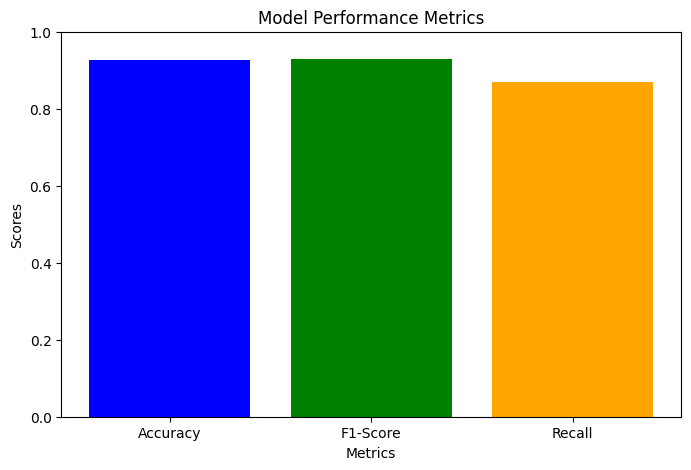

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score


f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


metrics = {
    'Accuracy': accuracy,
    'F1-Score': f1,
    'Recall': recall
}

# Plotting the metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Performance Metrics')
plt.ylim(0, 1)  # Scores are between 0 and 1
plt.show()


**Get and visualize confusion matrix**

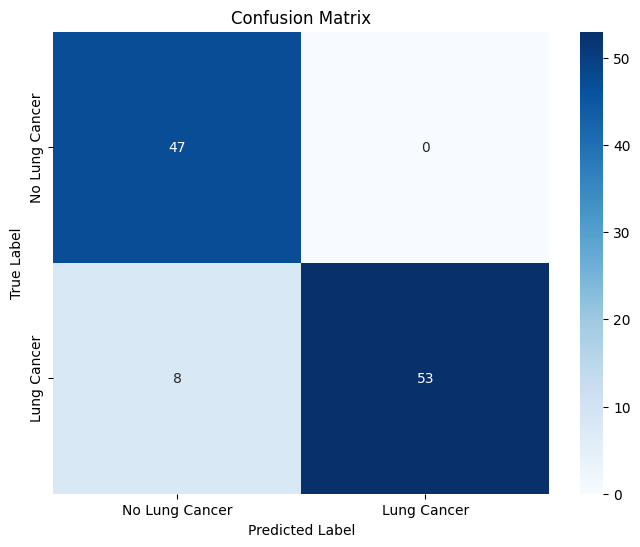

In [ ]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix (ensure y_test and y_pred are defined)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Lung Cancer', 'Lung Cancer'], yticklabels=['No Lung Cancer', 'Lung Cancer'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


**DATASET2**

**This dataset contains a target variable "Level" where 0 is low, 0.5 is meduim, and 1 is high.**  

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

# Load the dataset from your specified path
data = pd.read_csv('/content/gdrive/MyDrive/Datasets/2_nrml.csv')

# Display the first few rows to ensure the data is loaded correctly
data.head()


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,Occupational Hazards,Genetic Risk,Chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0.322034,0,0.142857,0.428571,0.571429,0.428571,0.333333,0.166667,0.166667,0.500000,...,0.250,0.428571,0.125,0.142857,0.285714,0.000,0.166667,0.333333,0.500000,0.0
1,0.050847,0,0.285714,0.000000,0.571429,0.285714,0.500000,0.166667,0.166667,0.166667,...,0.000,0.285714,0.750,1.000000,0.714286,0.125,0.000000,1.000000,0.166667,0.5
2,0.355932,0,0.428571,0.571429,0.714286,0.571429,0.666667,0.500000,0.833333,1.000000,...,0.875,0.857143,1.000,0.142857,0.000000,0.375,0.833333,1.000000,0.166667,1.0
3,0.389831,0,0.857143,0.857143,0.857143,0.857143,0.833333,1.000000,1.000000,1.000000,...,0.375,0.142857,0.250,0.000000,0.428571,0.500,0.833333,1.000000,0.666667,1.0
4,0.542373,0,0.714286,1.000000,0.857143,0.857143,1.000000,0.833333,1.000000,1.000000,...,0.250,0.142857,0.375,0.000000,0.428571,0.125,0.500000,0.166667,0.333333,1.0


**Date preprocessing is formed. The target vaariable "level" is of continuos nature, 0, 0.5 and 1. However, logistic regression handles discrete valuse only. hence, the values were changed to 0,1 and 2 respectivly.**

In [ ]:
from sklearn.model_selection import train_test_split

# Prepare the features (X) and target (y)
X = data.drop(columns=['Level'])  # Features
y = data['Level'].map({0.0: 0, 0.5: 1, 1.0: 2})  # Transform the target variable into discrete categories

# Handle potential NaN values after mapping (if any)
X = X[y.notna()]  # Keep only rows where y is not NaN
y = y.dropna()    # Drop NaN values in y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Applying Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the logistic regression model with stronger regularization (lower C value)
log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', C=0.01)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate classification report and confusion matrix
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        55
           1       0.93      0.84      0.88        63
           2       0.87      1.00      0.93        82

    accuracy                           0.92       200
   macro avg       0.93      0.91      0.92       200
weighted avg       0.93      0.92      0.92       200


Confusion Matrix:
 [[49  4  2]
 [ 0 53 10]
 [ 0  0 82]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


**Get precision, recall and f1 score**

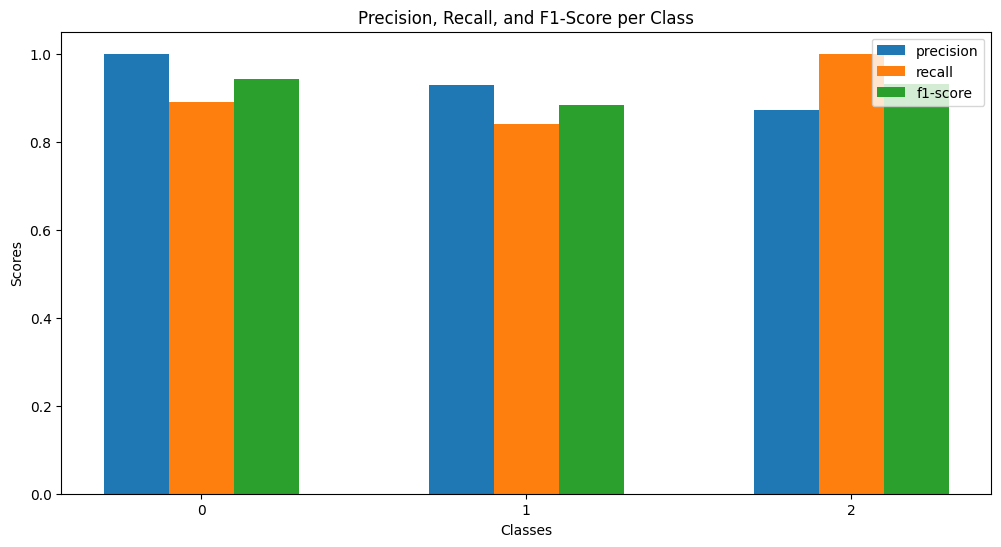

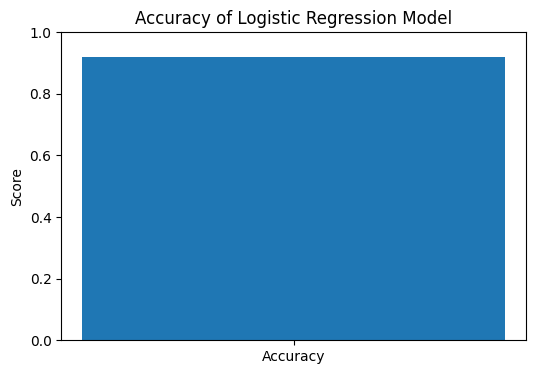

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Compute classification metrics for visualization
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Extracting the metrics for visualization
metrics = ['precision', 'recall', 'f1-score']
classes = list(report_dict.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
values = {metric: [report_dict[cls][metric] for cls in classes] for metric in metrics}

# Plotting metrics
plt.figure(figsize=(12, 6))
x = np.arange(len(classes))

for i, metric in enumerate(metrics):
    plt.bar(x + i*0.2, values[metric], width=0.2, label=metric)

plt.xticks(x + 0.2, classes)
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1-Score per Class')
plt.legend()
plt.show()

# Plotting accuracy separately
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy])
plt.title('Accuracy of Logistic Regression Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()


**Visualizing confusion matrix**

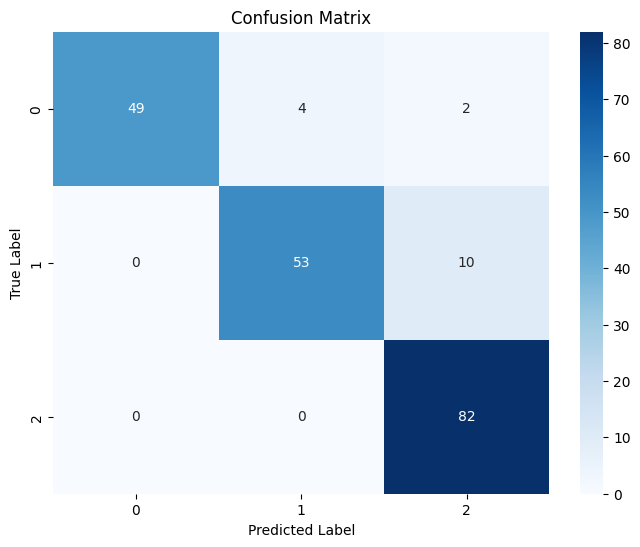

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


**Get and visualize cross validation**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' w

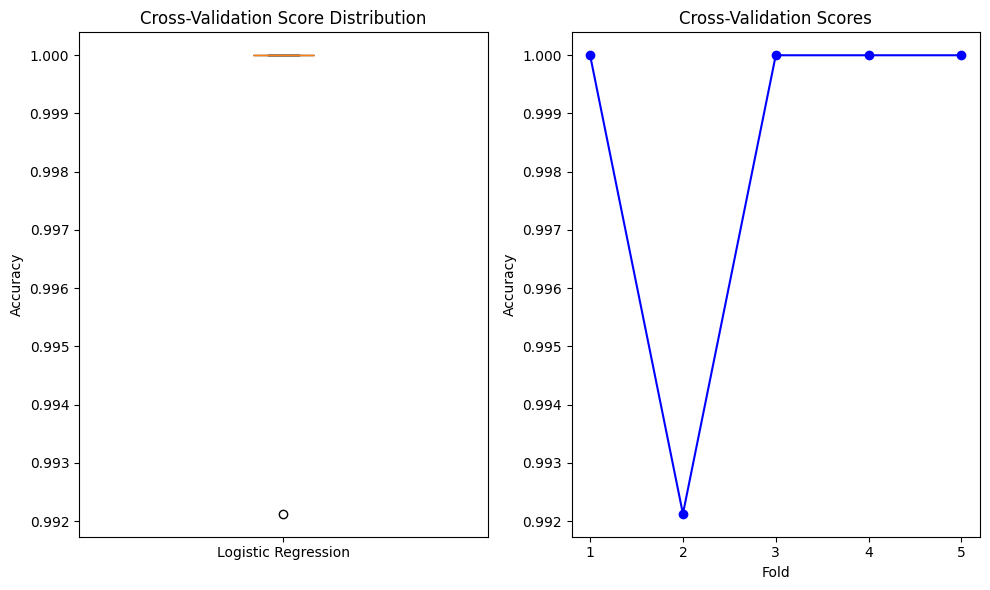

In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression


cross_val_scores = cross_val_score(LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs'), X, y, cv=5)

plt.figure(figsize=(10, 6))


plt.subplot(1, 2, 1)
plt.boxplot(cross_val_scores, vert=True, patch_artist=True)
plt.title('Cross-Validation Score Distribution')
plt.ylabel('Accuracy')
plt.xticks([1], ['Logistic Regression'])

plt.subplot(1, 2, 2)
plt.plot(np.arange(1, len(cross_val_scores) + 1), cross_val_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, len(cross_val_scores) + 1))

plt.tight_layout()
plt.show()


This plot shows high accuracy among the folds with one drop. The drop suggests that there might be differences in the data distirbution within that subset, this could be due to different data characteristicts.

**Comparing the training accuracy and testing accuracy to check if the model is over fitting.**

In [ ]:
# Evaluate the model on training data
y_train_pred = log_reg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# Evaluate the model on testing data
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {test_accuracy}")


Training Accuracy: 0.92
Testing Accuracy: 0.92


**Get and visualize the learning curve**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' w

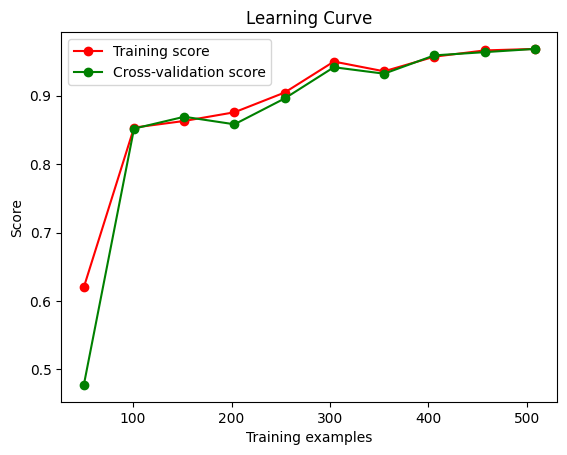

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    log_reg, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


The convergance of training score and cross-validation score indicates that the model is well fitted